# Done by:
# Obada Alhumsi

## Importing libraries & core log data


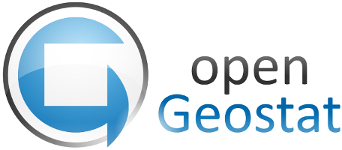

In [2]:
# Imports of useful libraries
import paraview 
import numpy as np
import pandas as pd
import pygslib
import matplotlib.pylab as plt

In [3]:
#Core log data
collar = pd.read_csv('collar_BABBITT.csv')
survey = pd.read_csv('survey_BABBITT.csv')
assay = pd.read_csv('assay_BABBITT.csv')

## Quick Glance into imported data

In [4]:
#collar data
print(collar.head(10))

     BHID     XCOLLAR    YCOLLAR  ZCOLLAR
0   34873  2296021.09  414095.85   1590.0
1  B1-001  2294148.20  420495.90   1620.9
2  B1-002  2296769.50  422333.50   1553.0
3  B1-003  2297820.11  423647.40   1565.0
4  B1-004  2298789.91  424357.51   1544.0
5  B1-005  2299166.09  423783.80   1528.0
6  B1-006  2296388.20  421454.09   1584.8
7  B1-007  2299545.90  423193.40   1545.0
8  B1-008  2298773.89  423649.00   1535.5
9  B1-009  2299448.39  424085.69   1531.4


In [5]:
#survey data
print(survey.head(10))

     BHID     AT   AZ   DIP
0   34873    0.0    0  90.0
1  B1-001    0.0  327  60.0
2  B1-002    0.0  327  60.0
3  B1-002  453.0  327  60.0
4  B1-003    0.0  327  45.0
5  B1-003  466.0  327  45.0
6  B1-004    0.0  327  60.0
7  B1-004  509.0  327  60.0
8  B1-005    0.0  338  60.0
9  B1-005  397.5  338  60.0


In [6]:
#assay data
print(assay.head(10))

    BHID    FROM      TO    CU    NI   S  FE
0  34873     0.0  2515.0   NaN   NaN NaN NaN
1  34873  2515.0  2517.4  0.03  0.08 NaN NaN
2  34873  2517.4  2518.9  0.04  0.10 NaN NaN
3  34873  2518.9  2524.0  0.41  0.18 NaN NaN
4  34873  2524.0  2524.9  0.23  0.17 NaN NaN
5  34873  2524.9  2535.0  0.16  0.16 NaN NaN
6  34873  2535.0  2545.0  0.34  0.20 NaN NaN
7  34873  2545.0  2557.2  0.34  0.14 NaN NaN
8  34873  2557.2  2562.7  0.16  0.10 NaN NaN
9  34873  2562.7  2565.0  0.20  0.10 NaN NaN


## Creating a pygslib drillhole with assay data of interest

In [7]:
#data cleaning, keping only columns of interests 
assay.drop(['NI','S','FE'], axis=1, inplace = True)
assay.loc[~np.isfinite(assay['CU']), 'CU']=0

In [8]:
#creating drillhole in pyglisb
mydholedb = pygslib.drillhole.Drillhole(collar=collar, survey=survey)

#Dril hole class fucntions: can add assay, fix interevel erros, and 
#validate the data in the table added
mydholedb.addtable(assay,'assay',overwrite = False)
mydholedb.fix_survey_one_interval_err(90000.)
mydholedb.validate_table('assay')

C:\Users\obada\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:2: UserWarning: ! Collar table without LENGTH field
  
C:\Users\obada\Anaconda3\envs\mypython\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [9]:
# creating a length column in drilhole assay table then calaculating mode
mydholedb.table['assay']['Length'] = mydholedb.table['assay']['TO']- mydholedb.table['assay']['FROM']
print('The length Mode is: ', mydholedb.table['assay']['Length'].mode()[0])

('The length Mode is: ', 10.0)


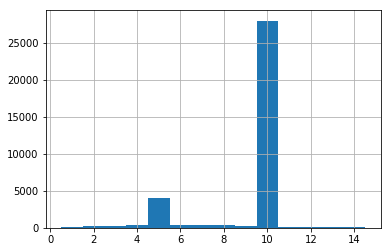

In [10]:
# Organizing length of samples into histograms
mydholedb.table['assay']['Length'].hist(bins=np.arange(15)+0.5)

### Most of the drillholes were drilled 10 in depth.

In [11]:
# Compositing
mydholedb.downh_composite('assay',
                          variable_name = "CU",
                          new_table_name = "CMP",
                          cint = 10,
                          minlen = -1,
                          overwrite = True)

In [12]:
# Desurveying for 3D
mydholedb.desurvey('CMP', warns = False, endpoints = True)
print(mydholedb.table["CMP"].head(3))

    BHID   CU  FROM    TO  _acum  _len   azmm  dipm          xm         ym  \
0  34873  0.0   0.0  10.0    0.0  10.0  180.0  90.0  2296021.09  414095.85   
1  34873  0.0  10.0  20.0    0.0  10.0  180.0  90.0  2296021.09  414095.85   
2  34873  0.0  20.0  30.0    0.0  10.0  180.0  90.0  2296021.09  414095.85   

    ...     azmb  dipb          xb         yb      zb   azme  dipe  \
0   ...    180.0  90.0  2296021.09  414095.85  1590.0  180.0  90.0   
1   ...    180.0  90.0  2296021.09  414095.85  1580.0  180.0  90.0   
2   ...    180.0  90.0  2296021.09  414095.85  1570.0  180.0  90.0   

           xe         ye      ze  
0  2296021.09  414095.85  1580.0  
1  2296021.09  414095.85  1570.0  
2  2296021.09  414095.85  1560.0  

[3 rows x 21 columns]


In [13]:
mydholedb.txt2intID('CMP')
print(mydholedb.table["CMP"][['BHID','BHIDint', 'FROM', 'TO']].tail(3))

            BHID  BHIDint    FROM      TO
54186  RMC-66313      399   990.0  1000.0
54187  RMC-66313      399  1000.0  1010.0
54188  RMC-66313      399  1010.0  1020.0


### Visualizing drillholes in paraview, using vtk.

In [14]:
mydholedb.intervals2vtk('CMP','cmpobada.vtk')

C:\Users\obada\Anaconda3\envs\mypython\lib\site-packages\vtk\util\numpy_support.py:134: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [15]:
# inspecting interval tables in drillhole object
print "Table names ", mydholedb.table_mames
print "Tables names", mydholedb.table.keys() 
print "table is    ", type(mydholedb.table)

Table names  ['assay', 'CMP']
Tables names ['assay', 'CMP']
table is     <type 'dict'>


In [16]:
# exporting to csv
mydholedb.table["CMP"].to_csv('cmp.csv', index=False)

In [17]:
# importing the wireframe (this one was created with https://geomodelr.com)
domain=pygslib.vtktools.loadSTL('Mpz.stl')

In [18]:
# creating array to tag samples in domain1
inside1=pygslib.vtktools.pointinsolid(domain, 
                       x=mydholedb.table['CMP']['xm'].values, 
                       y=mydholedb.table['CMP']['ym'].values, 
                       z=mydholedb.table['CMP']['zm'].values)

# reating a new domain field 
mydholedb.table['CMP']['Domain']=inside1.astype(int)

#first 3 rows of a subtable
mydholedb.table['CMP'][['BHID', 'FROM', 'TO', 'Domain']].head(3)

,BHID,FROM,TO,Domain
0,34873,0.0,10.0,0
1,34873,10.0,20.0,0
2,34873,20.0,30.0,0


In [19]:
# exporting results to VTK
mydholedb.intervals2vtk('CMP', 'Domain_and_drill_cores_3D')

# exporting to csv
mydholedb.table["CMP"].to_csv('cmp.csv', index=False)

In [20]:
# The model definition
xorg = 2288230
yorg = 415200
zorg = -1000
dx = 100
dy = 100
dz = 30
nx = 160
ny = 100
nz = 90

In [21]:
# Creating an empty block model
mymodel=pygslib.blockmodel.Blockmodel(nx,ny,nz,xorg,yorg,zorg,dx,dy,dz)

# filling wireframe with blocks
mymodel.fillwireframe(domain)

# the fillwireframe function generates a field named  __in, 
# this is the proportion inside the wireframe. Here we rename __in to D1
mymodel.bmtable.rename(columns={'__in': 'D1'},inplace=True)

# creating a partial model by filtering out blocks with zero proportion inside the solid
mymodel.set_blocks(mymodel.bmtable[mymodel.bmtable['D1']> 0])

# export partial model to a vtk unstructured grid (*.vtu)
mymodel.blocks2vtkUnstructuredGrid(path='model.vtu')

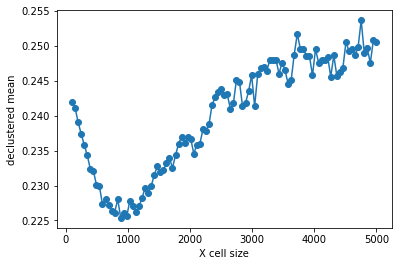

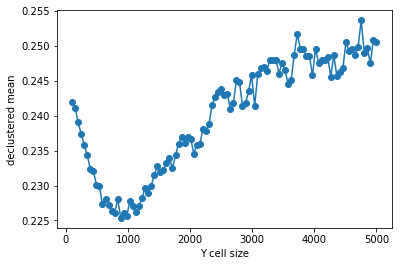

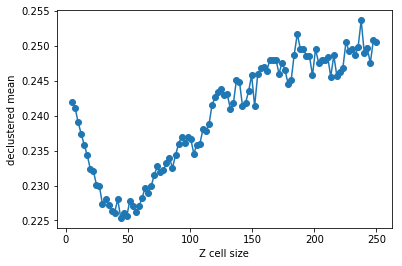

In [22]:
#declustering parameters
parameters_declus = {
       'x'      :  mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'xm'],
       'y'      :  mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'ym'],
       'z'      :  mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'zm'],
       'vr'     :  mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'CU'],
       'anisy'  :  1.,
       'anisz'  :  0.05,
       'minmax' :  0,
       'ncell'  :  100,
       'cmin'   :  100.,
       'cmax'   :  5000.,
       'noff'   :  8,
       'maxcel' :  -1}
# declustering
wtopt,vrop,wtmin,wtmax,error, \
xinc,yinc,zinc,rxcs,rycs,rzcs,rvrcr = pygslib.gslib.declus(parameters_declus)
#Plotting declustering optimization results
plt.plot (rxcs, rvrcr, '-o')
plt.xlabel('X cell size')
plt.ylabel('declustered mean')
plt.show()
plt.plot (rycs, rvrcr, '-o')
plt.xlabel('Y cell size')
plt.ylabel('declustered mean')
plt.show()
plt.plot (rzcs, rvrcr, '-o')
plt.xlabel('Z cell size')
plt.ylabel('declustered mean')
plt.show()

In [23]:
>>> # parameters for declustering with the cell size selected
>>> parameters_declus = {
...        'x'      :  mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'xm'],
...        'y'      :  mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'ym'],
...        'z'      :  mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'zm'],
...        'vr'     :  mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'CU'],
...        'anisy'  :  1.,    # y == x
...        'anisz'  :  0.1,  # z = x/20
...        'minmax' :  0,
...        'ncell'  :  1,
...        'cmin'   :  1000.,
...        'cmax'   :  1000.,
...        'noff'   :  8,
...        'maxcel' :  -1}
>>>
>>>
>>> # declustering
>>> wtopt,vrop,wtmin,wtmax,error, \
...   xinc,yinc,zinc,rxcs,rycs,rzcs,rvrcr = pygslib.gslib.declus(parameters_declus)
>>>
>>> # Adding declustering weight to a drillhole interval table
>>> mydholedb.table["CMP"]['declustwt'] = 1
>>> mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'declustwt'] = wtopt
>>> # calculating declustered mean
>>> decl_mean = rvrcr[0]

In [24]:
# prepare parameters dictionary
>>> parameters = {
        'hmin' : None,                          #in/output rank-0 array(float,'d')
        'hmax' : None,                         #in/output rank-0 array(float,'d')
        'ncl'  : 30,                            #int, number of bins
        'iwt'  : 1,                             #int, 1 use declustering weight
        'ilog' : 1,                             #int, 1 use logscale
        'icum' : 0,                             #int, 1 use cumulative
        'va'   : mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'CU'],             # array('d') with bounds (nd)
        'wt'   : mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'declustwt'],                          # array('d') with bounds (nd), wight variable (obtained with declust?)
        'figure' : None ,                       # a bokeh figure object (Optional: new figure created if None). Set none or undefined if creating a new figure.
        'title'  : 'Hist Cu',                    # string. Figure title
        'xlabel' : 'Cu (%)', # string. X axis label
        'ylabel' : 'f(%)', # string. Y axis label
        # visual parameter for the histogram
        'color' : 'red', # string with valid CSS colour (https://www.w3schools.com/colors/colors_names.asp), or an RGB(A) hex value, or tuple of integers (r,g,b), or tuple of (r,g,b,a)
        'legend': 'Non - Declustered', # string (Optional, default "NA")
        'alpha' :  0.5, # float [0-1]. Transparency of the fill colour
        'lwidth': 1, # float. Line width
        # legend
        'legendloc': 'top_left'}  
>>>
>>> # calculate histogram
>>> stats, fig = pygslib.plothtml.histgplt(parameters)
>>> print ('CV', stats['xcvr'])
>>> print ('Mean', stats['xmen'])
>>> print ('Min', stats['xmin'])
>>> print ('Max', stats['xmax'])
# show the figure
pygslib.plothtml.show(fig)
('CV', 1.4711890014945388)
('Mean', 0.2251903672467922)
('Min', 0.0)
('Max', 15.4000001)

('CV', 1.4711890014945388)
('Mean', 0.2251903672467922)
('Min', 0.0)
('Max', 15.4000001)


('Max', 15.4000001)

In [25]:
# plot CDF
>>> parameters_probplt = {
        # gslib parameters for histogram calculation  
        'iwt'  : 1, # input boolean (Optional: set True). Use weight variable?
        'va'   : mydholedb.table["CMP"].loc[(mydholedb.table['CMP']['Domain']==1) & (mydholedb.table['CMP']['CU']>0), 'CU'],             # array('d') with bounds (nd)
        'wt'   : mydholedb.table["CMP"].loc[(mydholedb.table['CMP']['Domain']==1) & (mydholedb.table['CMP']['CU']>0), 'declustwt'],                          # array('d') with bounds (nd), wight variable (obtained with declust?)
        # visual parameters for figure (if a new figure is created)
        'figure' : None, # a bokeh figure object (Optional: new figure created if None). Set none or undefined if creating a new figure.
        'title'  : 'Prob blot', # string (Optional, "Histogram"). Figure title
        'xlabel' : 'Cu', # string (Optional, default "Z"). X axis label
        'ylabel' : 'P[Cu<c]', # string (Optional, default "f(%)"). Y axis label
        'xlog' : 1, # boolean (Optional, default True). If true plot X axis in log sale.
        'ylog' : 1, # boolean (Optional, default True). If true plot Y axis in log sale.            
        # visual parameter for the probplt
        'style' : 'cross', # string with valid bokeh chart type
        'color' : 'blue', # string with valid CSS colour (https://www.w3schools.com/colors/colors_names.asp), or an RGB(A) hex value, or tuple of integers (r,g,b), or tuple of (r,g,b,a) (Optional, default "navy")
        'legend': 'Declustered Cu', # string (Optional, default "NA").
        'alpha' : 1, # float [0-1] (Optional, default 0.5). Transparency of the fill colour
        'lwidth': 0, # float (Optional, default 1). Line width
        # legend
        'legendloc': 'bottom_right'} #  float (Optional, default 'top_right'). Any of top_left, top_center, top_right, center_right, bottom_right, bottom_center, bottom_left, center_left or center
>>>
>>> results, fig2 = pygslib.plothtml.probplt(parameters_probplt)
>>> # show the plot
>>> pygslib.plothtml.show(fig2)

In [29]:
# organize values into separate bins
print (results)
{'binval': ([1.35875964e-05, 4.50984100e-05, 2.94870422e-04,
        9.99926438e-01, 9.99954949e-01, 9.99984753e-01]),
 'cl': ([9.99999980e-04, 9.99999980e-04, 1.00000001e-03,
        1.09999997e+01, 1.43499999e+01, 1.54000001e+01]),
 'error': 0,
 'xcvr': 0.9587717427220468,
 'xlqt': 0.1400000005,
 'xmax': 15.4000001,
 'xmed': 0.30100000042190583,
 'xmen': 0.30100000042190583,
 'xmin': 0.0009999999799999999,
 'xpt025': 0.014999999650000002,
 'xpt975': 1.0732820446853633,
 'xuqt': 0.525000006,
 'xvar': 0.12672198696392797}

{'xuqt': 0.525000006, 'xpt975': 1.0732820446853633, 'cl': array([9.99999980e-04, 9.99999980e-04, 1.00000001e-03, ...,
       1.09999997e+01, 1.43499999e+01, 1.54000001e+01]), 'xpt025': 0.014999999650000002, 'xmen': 0.30100000042190583, 'xmin': 0.0009999999799999999, 'xmed': 0.30100000042190583, 'xlqt': 0.1400000005, 'xvar': 0.12672198696392797, 'xcvr': 0.9587717427220468, 'xmax': 15.4000001, 'error': 0, 'binval': array([1.35875964e-05, 4.50984100e-05, 2.94870422e-04, ...,
       9.99926438e-01, 9.99954949e-01, 9.99984753e-01])}


{'binval': [1.35875964e-05,
  4.509841e-05,
  0.000294870422,
  0.999926438,
  0.999954949,
  0.999984753],
 'cl': [0.00099999998,
  0.00099999998,
  0.00100000001,
  10.9999997,
  14.3499999,
  15.4000001],
 'error': 0,
 'xcvr': 0.9587717427220468,
 'xlqt': 0.1400000005,
 'xmax': 15.4000001,
 'xmed': 0.30100000042190583,
 'xmen': 0.30100000042190583,
 'xmin': 0.0009999999799999999,
 'xpt025': 0.014999999650000002,
 'xpt975': 1.0732820446853633,
 'xuqt': 0.525000006,
 'xvar': 0.12672198696392797}

In [31]:
>>> # creating parameter dictionary for estimation in one block
>>> kt3d_Parameters = {
          # Input Data (Only using intervals in the mineralized domain)
          # ----------
          'x' : mydholedb.table["CMP"]['xm'][mydholedb.table["CMP"]['Domain']==1].values,
          'y' : mydholedb.table["CMP"]['ym'][mydholedb.table["CMP"]['Domain']==1].values,
          'z' : mydholedb.table["CMP"]['zm'][mydholedb.table["CMP"]['Domain']==1].values,
          'vr' : mydholedb.table["CMP"]['CU'][mydholedb.table["CMP"]['Domain']==1].values,
          'bhid' : mydholedb.table["CMP"]['BHIDint'][mydholedb.table["CMP"]['Domain']==1].values, # an interger BHID
          # Output (Target)
          # ----------
          'nx' : nx,  
          'ny' : ny,  
          'nz' : nz,
          'xmn' : xorg,  
          'ymn' : yorg,  
          'zmn' : zorg,  
          'xsiz' : dx,  
          'ysiz' : dy,   
          'zsiz' : dz,
          'nxdis' : 5,  
          'nydis' : 5,  
          'nzdis' : 3,  
          'outx' : mymodel.bmtable['XC'][mymodel.bmtable['IJK']==1149229].values,  # filter to estimate only on block with IJK 1149229
          'outy' : mymodel.bmtable['YC'][mymodel.bmtable['IJK']==1149229].values,
          'outz' : mymodel.bmtable['ZC'][mymodel.bmtable['IJK']==1149229].values,
          # Search parameters
          # ----------
          'radius'     : 850,   
          'radius1'    : 850,   
          'radius2'    : 250,   
          'sang1'      : -28,  
          'sang2'      : 34,   
          'sang3'      : 7,   
          'ndmax'      : 12,    
          'ndmin'      : 4,  
          'noct'       : 0,
          'nbhid'      : 3,   
          # Kriging parameters and options
          # ----------
          'ktype'      : 1,   # 1 Ordinary kriging
          'idbg'       : 1,   # 0 no debug
          # Variogram parameters
          # ----------
          'c0'         : 0.35 * 0.109758094158,               # we require not normalized variance for GCOS, fix... multiply for actual variance
          'it'         : [2,2],    
          'cc'         : [0.41*0.109758094158,0.23*0.109758094158],
          'aa'         : [96,1117],   
          'aa1'        : [96,1117],  
          'aa2'        : [96,300],   
          'ang1'       : [-28,-28],   
          'ang2'       : [ 34, 34],  
          'ang3'       : [  7,  7]}

## Looking at a single blocks in the domain , different locations were estimated to have a grade of 0.060 to 0.095. Furthermore, using the declustered mean in the x-y-z directions, different models were built and assessed as shown above. The results of a DGM with block support and Ordinary kriging were similar in the cut-off grade at approximately 0.22. Inverse of the distance is also a good predictor, although its results are probably not as accurate as kriging and DGM which also access their own bias. 

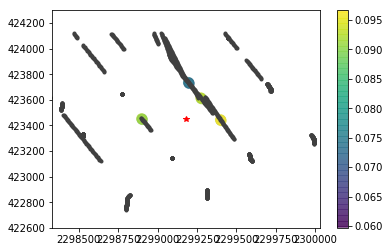

In [32]:
>>> # estimating in one block
>>> estimate, debug, summary = pygslib.gslib.kt3d(kt3d_Parameters)

In [33]:
>>> # saving debug to a csv file using Pandas
>>> pd.DataFrame({'x':debug['dbgxdat'],
                  'y':debug['dbgydat'],
                  'z':debug['dbgzdat'],
                  'wt':debug['dbgwt']}).to_csv('dbg_data.csv', index=False)
>>>
>>> # save the search ellipse to a VTK file
>>> pygslib.vtktools.SavePolydata(debug['ellipsoid'], 'search_ellipsoid')

In [34]:
>>> # update parameter file
>>> kt3d_Parameters['idbg'] = 0 # set the debug of
>>> kt3d_Parameters['outx'] = mymodel.bmtable['XC'].values  # use all the blocks
>>> kt3d_Parameters['outy'] = mymodel.bmtable['YC'].values
>>> kt3d_Parameters['outz'] = mymodel.bmtable['ZC'].values

In [35]:
>>> # estimating in all blocks
>>> estimate, debug, summary = pygslib.gslib.kt3d(kt3d_Parameters)

In [36]:
>>> # adding the estimate into the model
>>> mymodel.bmtable['CU_OK'] = estimate['outest']
>>> mymodel.bmtable['CU_ID2'] = estimate['outidpower']
>>> mymodel.bmtable['CU_NN'] = estimate['outnn']
>>> mymodel.bmtable['CU_Lagrange'] = estimate['outlagrange']
>>> mymodel.bmtable['CU_KVar']= estimate['outkvar']

In [37]:
>>> # exporting block model to VTK (unstructured grid)
>>> mymodel.blocks2vtkUnstructuredGrid(path='model.vtu')
>>> # exporting to csv using Pandas
>>> mymodel.bmtable['Domain']= 1
>>> mymodel.bmtable[mymodel.bmtable['CU_OK'].notnull()].to_csv('model.csv', index = False)

In [38]:
>>> print ("Mean in model OK   :",  mymodel.bmtable['CU_OK'].mean())
>>> print ("Mean in model ID2   :",  mymodel.bmtable['CU_ID2'].mean())
>>> print ("Mean in model NN   :",  mymodel.bmtable['CU_NN'].mean())
>>> print ("Mean in data    :", mydholedb.table["CMP"]['CU'][mydholedb.table["CMP"]['Domain']==1].mean())
>>> print ("Declustered mean:", decl_mean)

('Mean in model OK   :', 0.2116580307483673)
('Mean in model ID2   :', 0.20810183882713318)
('Mean in model NN   :', 0.20687317848205566)
('Mean in data    :', 0.24149141734342466)
('Declustered mean:', 0.2251903672467954)


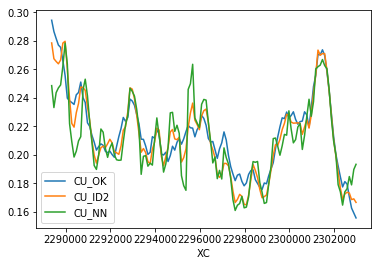

In [39]:
# plot CU_OK, CU_ID2, CU_NN
>>> mymodel.bmtable.groupby('XC')[['CU_OK','CU_ID2','CU_NN']].mean().plot()

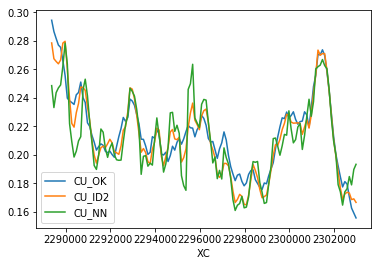

In [40]:
>>> mymodel.bmtable.groupby('XC')[['CU_OK','CU_ID2','CU_NN']].mean().plot()

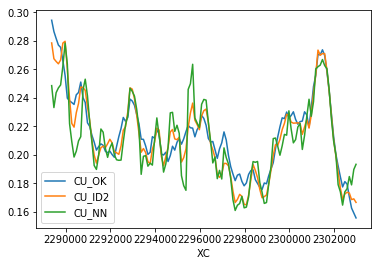

In [41]:
>>> mymodel.bmtable.groupby('XC')[['CU_OK','CU_ID2','CU_NN']].mean().plot()

Raw Variance 0.109758094158
Variance from PCI 0.10922679995417846
zamin 0.01520555988670437
zamax 15.39374277733923
yamin -0.26905381076215207
yamax 4.231846369273855
zpmin 0.0019999999599999998
zpmax 15.398035249048217
ypmin -0.26905381076215207
ypmax 4.281856371274255


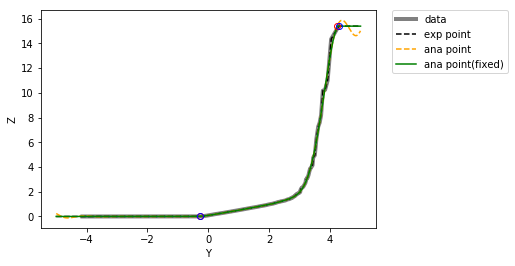

In [42]:
>>> PCI, H, raw, zana, gauss, z, P, raw_var, PCI_var, fig1 = pygslib.nonlinear.anamor(
       z = mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'CU'],
       w = mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'declustwt'],
       zmin = mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'CU'].min(),
       zmax = mydholedb.table["CMP"].loc[mydholedb.table['CMP']['Domain']==1, 'CU'].max(),
       zpmin = None, zpmax = None,
       ymin=-5, ymax=5,
       ndisc = 5000,
       ltail=1, utail=4, ltpar=1, utpar=1.5, K=40)

In [47]:
r = pygslib.nonlinear.get_r(Var_Zv = 0.031, PCI = PCI)


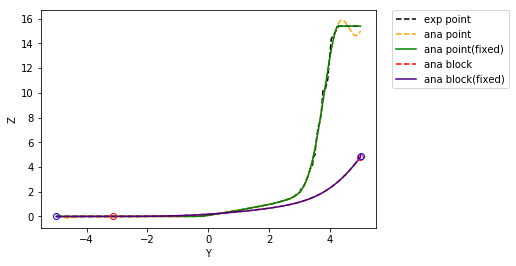

In [48]:
>>> ZV, PV, fig2 = pygslib.nonlinear.anamor_blk( PCI, H, r = r, gauss = gauss, Z = z,
                  ltail=1, utail=1, ltpar=1, utpar=1,
                  raw=raw, zana=zana)

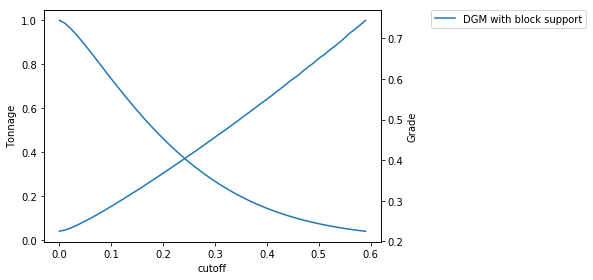

In [49]:
cutoff = np.arange(0,0.6, 0.01)
tt = []
gg = []
label = []

# calculate GTC from gaussian in block support
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=ZV, p=PV, varred = 1, ivtyp = 0, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('DGM with block support')

fig = pygslib.nonlinear.plotgt(cutoff = cutoff, t = tt, g = gg, label = label)

In [52]:
# to compare global resources with the one estimated we calculate the CDF of the blocks
# cdf of kriging estimate
parameters_probplt = {
        'iwt'  : 0,                             #int, 1 use declustering weight
        'va'   : mymodel.bmtable['CU_OK'][mymodel.bmtable['CU_OK'].notnull()].values,             # array('d') with bounds (nd)
        'wt'   : np.ones(mymodel.bmtable['CU_OK'][mymodel.bmtable['CU_OK'].notnull()].shape[0])} # array('d') with bounds (nd), wight variable (obtained with declust?)


binval_ok,cl_ok,xpt025,xlqt,xmed,xuqt,xpt975,xmin,xmax, \
        xcvr,xmen,xvar,error = pygslib.gslib.__plot.probplt(**parameters_probplt)

# cdf of id2
parameters_probplt = {
        'iwt'  : 0,                             #int, 1 use declustering weight
        'va'   : mymodel.bmtable['CU_ID2'][mymodel.bmtable['CU_OK'].notnull()].values,             # array('d') with bounds (nd)
        'wt'   : np.ones(mymodel.bmtable['CU_OK'][mymodel.bmtable['CU_OK'].notnull()].shape[0])} # array('d') with bounds (nd), wight variable (obtained with declust?)

binval_id2,cl_id2,xpt025,xlqt,xmed,xuqt,xpt975,xmin,xmax, \
       xcvr,xmen,xvar,error = pygslib.gslib.__plot.probplt(**parameters_probplt)

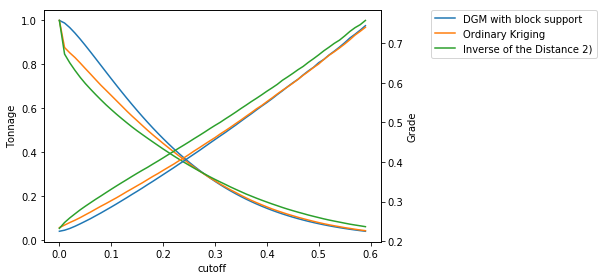

In [53]:
>>> # calculate GTC ok
>>> t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=cl_ok,
               p=binval_ok, varred = 1, ivtyp = 2, zmin = 0, zmax = None,
              ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1,
              utpar = 1,maxdis = 1000)
>>> tt.append(t)
>>> gg.append(ga)
>>> label.append('Ordinary Kriging')
>>>
>>> # calculate GTC in block support
>>> t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=cl_id2,
              p=binval_id2, varred = 1, ivtyp = 2, zmin = 0, zmax = None,
              ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1,
              utpar = 1,maxdis = 1000)
>>> tt.append(t)
>>> gg.append(ga)
>>> label.append('Inverse of the Distance 2)')
>>>
>>> fig = pygslib.nonlinear.plotgt(cutoff = cutoff, t = tt, g = gg, label = label)

## Ordinary kriging was accessed to have  less error in predicting grade and tonnage as shown in the two figures below. Depending on the tonnage required for the operation a cut-off grade can be chosen from this chart.

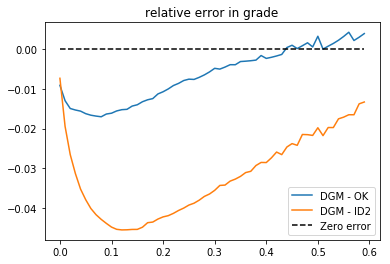

In [54]:
>>> # we can plot diferences (relative error in grade)
>>> plt.plot (cutoff, gg[0]-gg[1], label = 'DGM - OK')
>>> plt.plot (cutoff, gg[0]-gg[2], label = 'DGM - ID2')
>>> plt.plot (cutoff, np.zeros(cutoff.shape[0]),'--k', label = 'Zero error')
>>> plt.title('relative error in grade')
>>> plt.legend()

Text(0.5,1,u'relative error in tonnage')

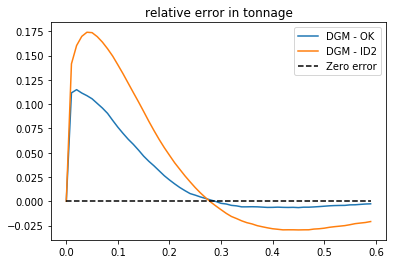

In [55]:
# we can plot diferences (relative error in tonnage)
>>> plt.plot (cutoff, tt[0]-tt[1], label = 'DGM - OK')
>>> plt.plot (cutoff, tt[0]-tt[2], label = 'DGM - ID2')
>>> plt.plot (cutoff, np.zeros(cutoff.shape[0]),'--k', label = 'Zero error')
>>> plt.legend()
>>> plt.title('relative error in tonnage')

In [56]:
# To get tonnes right just multiply per total tonnes
# calculate total tonnage (million tonnes)
ttonnes = mymodel.bmtable['D1'][mymodel.bmtable['CU_OK'].notnull()].sum()*100*100*30* 0.0283168 *  2.7 /1000000
# cubic foot to m -> 0.0283168, density 2.7

## Depending on the tonnage required for the operation a cut-off grade can be chosen from this chart.

Text(0.5,0,u'Cutoff')

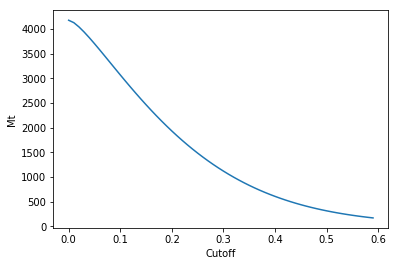

In [57]:
ttt = tt[0]*ttonnes
# plot to determine desired cutoff grade
plt.plot(cutoff, ttt)
plt.ylabel('Mt')
plt.xlabel('Cutoff')